In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [3]:
secretNumber = '1000101'

In [4]:
circuit = QuantumCircuit(len(secretNumber)+1,len(secretNumber)) #8 qubit, 7 classical bit, 1 helper qubit

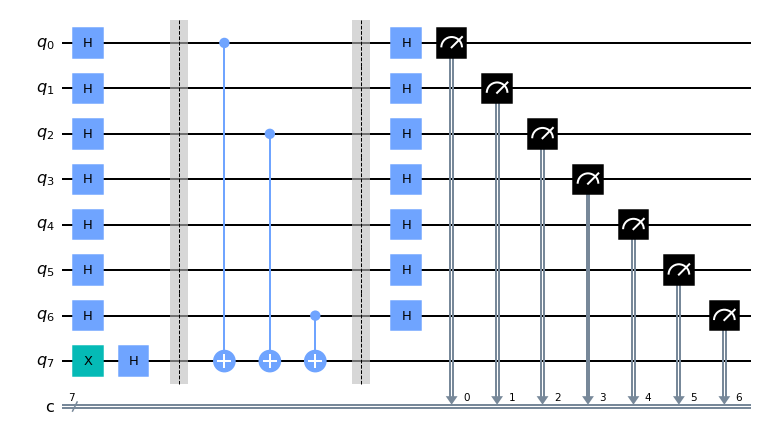

In [5]:
circuit.h(range(len(secretNumber)))
circuit.x(7)
circuit.h(7)
circuit.barrier()
#circuit.draw()
circuit.cx(0,7)
circuit.cx(2,7)
circuit.cx(6,7)
'''
for index , one in enumerate(secreatNumber[::-1]):  #slicing[from:to:step]
    print(f"index{index} is {one}")
    circuit.cx(index , len(secretNumber))
'''
circuit.barrier()
circuit.h([0,1,2,3,4,5,6])
circuit.measure([0,1,2,3,4,5,6],[0,1,2,3,4,5,6])
circuit.draw()

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend= simulator , shots=1)

In [7]:
r=result.result()


In [8]:
counts = r.get_counts()

In [9]:
print(counts)

{'1000101': 1}
